# 1.数据导入

从 UCI 网站（http://archive.ics.uci.edu/ml/index.php）下载 Breast Cancer Wisconsin 数据集(包括数据wdbc.data以及数据说明wdbc.names文件)，并用read_table实现数据的读取，两个数据集分别以逗号和换行为分隔符。

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import preprocessing,metrics
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_curve ,auc
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
dataset=pd.read_table(r'C:\Users\hp\Desktop\机器学习\wdbc.data',sep=',')
data_info=pd.read_table(r'C:\Users\hp\Desktop\机器学习\wdbc.names',sep='\n')

# 2.数据描述

对 Breast Cancer Wisconsin 数据集进行数据描述，包括样本数、特征数、特征信息、类别信息等。我们首先输出data_info内的内容，确定样本量为569条，包含39列，一列为ID，一列为Label（诊断结果，Diagnosis），其余30列为Feature（对Feature的介绍并不全面，只有部分说明）。接下来，由于data数据集中没有列名，所以默认将第一行作为列名，但是第一行是实际的样本数据，所以我们要将读取文件时被作为列名的数据加入到数据集中，同时修改列名。最后输出数据集的各种信息，确认数据处理成功。

## 2.1 输出数据信息

节选部分有效信息：   
5. Number of instances: 569   
6. Number of attributes: 32 (ID, diagnosis, 30 real-valued input features)   
7. Attribute information   
1) ID number   
2) Diagnosis (M = malignant, B = benign)   
3-32)   
Ten real-valued features are computed for each cell nucleus:   
	a) radius (mean of distances from center to points on the perimeter)   
	b) texture (standard deviation of gray-scale values)   
	c) perimeter   
	d) area   
	e) smoothness (local variation in radius lengths)   
	f) compactness (perimeter^2 / area - 1.0)   
	g) concavity (severity of concave portions of the contour)   
	h) concave points (number of concave portions of the contour)   
	i) symmetry    
	j) fractal dimension ("coastline approximation" - 1)   

In [3]:
for i in range(data_info.shape[0]):
    print(data_info.iloc[i,0])

2. Source Information
a) Creators: 
	Dr. William H. Wolberg, General Surgery Dept., University of
	Wisconsin,  Clinical Sciences Center, Madison, WI 53792
	wolberg@eagle.surgery.wisc.edu
	W. Nick Street, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	street@cs.wisc.edu  608-262-6619
	Olvi L. Mangasarian, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	olvi@cs.wisc.edu 
b) Donor: Nick Street
c) Date: November 1995
3. Past Usage:
first usage:
	W.N. Street, W.H. Wolberg and O.L. Mangasarian 
	Nuclear feature extraction for breast tumor diagnosis.
	IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science
	and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.
OR literature:
	O.L. Mangasarian, W.N. Street and W.H. Wolberg. 
	Breast cancer diagnosis and prognosis via linear programming. 
	Operations Research, 43(4), pages 570-577, July-August 1995.
Medical literature:
	W.H. Wolberg,

## 2.2修改列名，添加数据

In [3]:
dataset.loc[dataset.shape[0]]=dataset.columns#将被作为列名的数据添加到样本集中
feature_number_int=range(1,31)
feature_number=[]
for i in range(len(feature_number_int)):
    feature_number.append("Feature"+str(feature_number_int[i]) )#新列名
dataset.columns=['ID','Diagnosis']+feature_number
print(dataset)

           ID Diagnosis Feature1 Feature2 Feature3 Feature4 Feature5 Feature6  \
0      842517         M    20.57    17.77    132.9     1326  0.08474  0.07864   
1    84300903         M    19.69    21.25      130     1203   0.1096   0.1599   
2    84348301         M    11.42    20.38    77.58    386.1   0.1425   0.2839   
3    84358402         M    20.29    14.34    135.1     1297   0.1003   0.1328   
4      843786         M    12.45     15.7    82.57    477.1   0.1278     0.17   
..        ...       ...      ...      ...      ...      ...      ...      ...   
564    926682         M    20.13    28.25    131.2     1261   0.0978   0.1034   
565    926954         M     16.6    28.08    108.3    858.1  0.08455   0.1023   
566    927241         M     20.6    29.33    140.1     1265   0.1178    0.277   
567     92751         B     7.76    24.54    47.92      181  0.05263  0.04362   
568    842302         M    17.99    10.38    122.8     1001   0.1184   0.2776   

    Feature7 Feature8  ... 

## 2.3 数据描述

经过上述处理后，我们确认样本数为569，特征数为30，特征信息包括细胞核的半径和光滑度等，类别包含B(良性)、M（恶性）两类。

# 3.缺失值处理

使用df.info指令可以查看各列的数据类型以及缺失状况，经过处理后可知，数据集中没有缺失值。

# 4.数据标准化

In [7]:
for i in range(dataset.shape[0]):
    print(dataset.iloc[i,:])

ID             842517
Diagnosis           M
Feature1        20.57
Feature2        17.77
Feature3        132.9
Feature4         1326
Feature5      0.08474
Feature6      0.07864
Feature7       0.0869
Feature8      0.07017
Feature9       0.1812
Feature10     0.05667
Feature11      0.5435
Feature12      0.7339
Feature13       3.398
Feature14       74.08
Feature15    0.005225
Feature16     0.01308
Feature17      0.0186
Feature18      0.0134
Feature19     0.01389
Feature20    0.003532
Feature21       24.99
Feature22       23.41
Feature23       158.8
Feature24        1956
Feature25      0.1238
Feature26      0.1866
Feature27      0.2416
Feature28       0.186
Feature29       0.275
Feature30     0.08902
Name: 0, dtype: object
ID           84300903
Diagnosis           M
Feature1        19.69
Feature2        21.25
Feature3          130
Feature4         1203
Feature5       0.1096
Feature6       0.1599
Feature7       0.1974
Feature8       0.1279
Feature9       0.2069
Feature10     0.05999
Feature11

Name: 272, dtype: object
ID            8911163
Diagnosis           M
Feature1        17.93
Feature2        24.48
Feature3        115.2
Feature4        998.9
Feature5      0.08855
Feature6      0.07027
Feature7      0.05699
Feature8      0.04744
Feature9       0.1538
Feature10      0.0551
Feature11      0.4212
Feature12       1.433
Feature13       2.765
Feature14       45.81
Feature15    0.005444
Feature16     0.01169
Feature17     0.01622
Feature18    0.008522
Feature19     0.01419
Feature20    0.002751
Feature21       20.92
Feature22       34.69
Feature23       135.1
Feature24        1320
Feature25      0.1315
Feature26      0.1806
Feature27       0.208
Feature28      0.1136
Feature29      0.2504
Feature30     0.07948
Name: 273, dtype: object
ID            8911164
Diagnosis           B
Feature1        11.89
Feature2        17.36
Feature3         76.2
Feature4        435.6
Feature5       0.1225
Feature6       0.0721
Feature7      0.05929
Feature8      0.07404
Feature9       0.2015
Feat

Name: 527, dtype: object
ID             918465
Diagnosis           B
Feature1        12.07
Feature2        13.44
Feature3        77.83
Feature4        445.2
Feature5         0.11
Feature6      0.09009
Feature7      0.03781
Feature8      0.02798
Feature9       0.1657
Feature10     0.06608
Feature11      0.2513
Feature12       0.504
Feature13       1.714
Feature14       18.54
Feature15    0.007327
Feature16     0.01153
Feature17     0.01798
Feature18    0.007986
Feature19     0.01962
Feature20    0.002234
Feature21       13.45
Feature22       15.77
Feature23       86.92
Feature24       549.9
Feature25      0.1521
Feature26      0.1632
Feature27      0.1622
Feature28     0.07393
Feature29      0.2781
Feature30     0.08052
Name: 528, dtype: object
ID              91858
Diagnosis           B
Feature1        11.75
Feature2        17.56
Feature3        75.89
Feature4        422.9
Feature5       0.1073
Feature6      0.09713
Feature7      0.05282
Feature8       0.0444
Feature9       0.1598
Feat

标准化的原因在于如果有些特征的方差过大，则会主导目标函数从而使参数估计器无法正确地去学习其他特征。
使用sklearn.preprocessing中提供的scale的方法便可将各维度的特征数据标准化为均值为 0，方差为 1 的数据。同时由于label是文本数据，所以我们将其转变为0—1变量。

In [6]:
standard_dataset = preprocessing.scale(dataset.iloc[:,2:])
dataset.iloc[:,2:33]=standard_dataset
dataset.iloc[dataset['Diagnosis']=='B',1]=1
dataset.iloc[dataset['Diagnosis']=='M',1]=0

# 5.构造训练集与测试集

## 5.1 留出法（hold-out）

In [7]:
feature,label=dataset.iloc[:,2:33],dataset.iloc[:,1]
ho_fea_train,ho_fea_test,ho_label_train,ho_label_test=train_test_split(feature,label,test_size=0.3, train_size=0.7)

## 5.2 K折交叉验证（K-fold）

这里在翻阅scikit_learn官方文档时发现了一种优化的k折交叉验证的算法，Stratified它会根据数据集的分布来划分，使得划分后的数据集的目标比例和原始数据集近似，也就是构造训练集和测试集分布相同的交叉验证集，所以在实现k折交叉验证时同时尝试了两种方法。

In [8]:
kf = KFold(n_splits=5)
for kf_train, kf_test in kf.split(dataset):
    print("%s %s" % (kf_train, kf_test))

[114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293
 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311
 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329
 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347
 348 349 350 351 352 353 354 355 356 357 358 359 36

In [9]:
skf = StratifiedKFold(n_splits=5)
label_list=list(label)#skf.split指令要求label是一维的
for skf_train, skf_test in skf.split(feature, label_list):
    print("%s %s" % (skf_train, skf_test))

[ 53  55  56  61  63  64  69  71  72  74  76  77  81  82  84  85  86  90
  93  94  98  99 104 107 116 117 118 120 121 125 126 128 130 131 133 134
 137 140 145 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293
 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311
 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329
 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347
 348 349 350 351 352 353 354 355 356 357 358 359 36

# 6.模型训练与测试

## 6.1 Logistic Regression

In [10]:
ho_fea_train=ho_fea_train.astype('float64')#留出法进行训练
ho_label_train=ho_label_train.astype('int')#将数据中的unknown格式转化
ho_LR = LogisticRegression(random_state=0).fit(ho_fea_train, ho_label_train)

In [11]:
w=[0]*30#k折交叉验证训练
b=[0]
for kf_train, kf_test in kf.split(dataset):
    kf.feature=dataset.iloc[kf_train,2:33].astype('float64')
    kf.label=dataset.iloc[kf_train,2:33].astype('int')
    kf_LR = LogisticRegression(random_state=0).fit(ho_fea_train, ho_label_train)
    for i in range(len(w)):#k折交叉验证，k次训练结果取平均
        w[i]=w[i]+kf_LR.coef_[0][i]/5
    b[0]=b[0]+kf_LR.intercept_[0]/5

In [12]:
sw=[0]*30#改进k折交叉验证训练
sb=[0]
for skf_train, skf_test in skf.split(feature, label_list):
    skf.feature=dataset.iloc[skf_train,2:33].astype('float64')
    skf.label=dataset.iloc[skf_train,2:33].astype('int')
    skf_LR = LogisticRegression(random_state=0).fit(ho_fea_train, ho_label_train)
    for i in range(len(w)):
        sw[i]=sw[i]+skf_LR.coef_[0][i]/5
    sb[0]=sb[0]+skf_LR.intercept_[0]/5

补充说明：没有直接的使用交叉验证进行训练的函数，所以在k折交叉验证训练这里我采用了k次训练求平均的方法，这样做缺点是无法套用库中的函数去计算精度（因为训练结果并不是模型原有的结果），所以需要自己另外编写函数去实现。

## 6.2 Decision Tree

由于不同训练集测试集训练出的决策树不仅仅是参数上的不同，在树形上同样会有不同，所以并没有按照教科书上介绍的“参数取平均”的方法实现，查阅资料后也没有找到类似的方法，大部分方法是通过k次交叉验证后选择预测精度最高的那棵树当做最终的预测结果，与sci-kit learn库中网格搜索最优超参数值的函数gridcv函数类似，所以在这一部分里只使用了留出法进行训练。

In [13]:
tree=DecisionTreeClassifier().fit(ho_fea_train,ho_label_train)

# 7.性能度量

## 7.1 求解结果

由于6.1部分我们没有采用模型得到的参数，所以后续首先需要求解这些模型的训练结果。

In [14]:
kf.predict,skf.predict=[],[]
for i in range(dataset.shape[0]):
    score1=np.dot(np.array(dataset.iloc[i,2:33]),np.array(w))+b[0]
    score2=np.dot(np.array(dataset.iloc[i,2:33]),np.array(sw))+sb[0]
    result1=1/(1+math.exp(-score1))
    result2=1/(1+math.exp(-score2))
    kf.predict.append(result1)
    skf.predict.append(result2)
kf.predict_ture,skf.predict_ture=[],[]
for i in range(dataset.shape[0]):#由可能性得到模型预测的正例、反例情况
    if kf.predict[i]>0.5:
        kf.predict_ture.append(1)
    elif kf.predict[i]==0.5:
        kf.predict_ture.append(0.5)
    else :
        kf.predict_ture.append(0)
for i in range(dataset.shape[0]):
    if skf.predict[i]>0.5:
        skf.predict_ture.append(1)
    elif skf.predict[i]==0.5:
        skf.predict_ture.append(0.5)
    else :
        skf.predict_ture.append(0)

## 7.2 两种交叉验证方式精度比较

在这里只验证了对整体精度的影响，没有考虑其他指标。

In [15]:
kf_ture,skf_ture=0,0
for i in range(dataset.shape[0]):
    if kf.predict_ture[i]==dataset.iloc[i,1]:
        kf_ture+=1
    else:
        pass
for i in range(dataset.shape[0]):
    if skf.predict_ture[i]==dataset.iloc[i,1]:
        skf_ture+=1
    else:
        pass
print(kf_ture,skf_ture)
print(w,sw)

560 560
[-0.328141625092115, -0.30664257499511, -0.3326541756033871, -0.44707199504910544, 0.027388208864528446, 0.45546963411763514, -0.766276912371126, -0.7481023236274676, -0.16401699610868237, 0.21368043724140764, -1.0251892189919773, 0.14818584851357133, -0.5221469773021781, -0.8214659691468853, 0.14271680425151742, 0.7115397633582841, -0.12986463980761342, -0.2326523845274647, 0.05813678370738819, 0.7605150602909162, -0.9241777980653962, -1.182335139844829, -0.7191035791431111, -0.9499523305989321, -0.6859540679091738, 0.037739026891181325, -0.9685044598771775, -0.8939695253781126, -0.43101730262503624, -0.49502933270497085] [-0.328141625092115, -0.30664257499511, -0.3326541756033871, -0.44707199504910544, 0.027388208864528446, 0.45546963411763514, -0.766276912371126, -0.7481023236274676, -0.16401699610868237, 0.21368043724140764, -1.0251892189919773, 0.14818584851357133, -0.5221469773021781, -0.8214659691468853, 0.14271680425151742, 0.7115397633582841, -0.12986463980761342, -0.2

在此数据集上的训练结果精度竟是相同的,输出参数后发现两者的参数都是相同的。

## 7.3 其余结果展示

In [37]:
LR_value=ho_LR.predict(ho_fea_test)
DT_value=tree.predict(ho_fea_test)

In [32]:
feature,label=feature.astype('float64'),label.astype('int')
ho_label_test,LR_value=ho_label_test.astype('int'),LR_value.astype('int')
LR_accuracy=ho_LR.score(feature,label)
LR_confu_matrix=confusion_matrix(ho_label_test,LR_value)
LR_score=precision_score(ho_label_test,LR_value)
LR_recall=recall_score(ho_label_test,LR_value)
LR_f1=f1_score(ho_label_test,LR_value)
print("逻辑回归模型训练精度为%f"%LR_accuracy)
print("逻辑回归模型训练的混淆矩阵为\n%s"%LR_confu_matrix)
print("逻辑回归模型训练的查准率与查全率为%f ,%f"%(LR_score,LR_recall))
print("逻辑回归模型训练的f1值为%f"%LR_f1)

逻辑回归模型训练精度为0.984183
逻辑回归模型训练的混淆矩阵为
[[ 61   1]
 [  3 106]]
逻辑回归模型训练的查准率与查全率为0.990654 ,0.972477
逻辑回归模型训练的f1值为0.981481


In [33]:
DT_accuracy=tree.score(feature,label)
DT_confu_matrix=confusion_matrix(ho_label_test,DT_value)
DT_score=precision_score(ho_label_test,DT_value)
DT_recall=recall_score(ho_label_test,DT_value)
DT_f1=f1_score(ho_label_test,DT_value)
print("逻辑回归模型训练精度为%f"%DT_accuracy)
print("逻辑回归模型训练的混淆矩阵为\n%s"%DT_confu_matrix)
print("逻辑回归模型训练的查准率与查全率为%f ,%f"%(DT_score,DT_recall))
print("逻辑回归模型训练的f1值为%f"%DT_f1)

逻辑回归模型训练精度为0.980668
逻辑回归模型训练的混淆矩阵为
[[ 56   6]
 [  5 104]]
逻辑回归模型训练的查准率与查全率为0.945455 ,0.954128
逻辑回归模型训练的f1值为0.949772


In [39]:
print()

171


<Figure size 432x288 with 0 Axes>

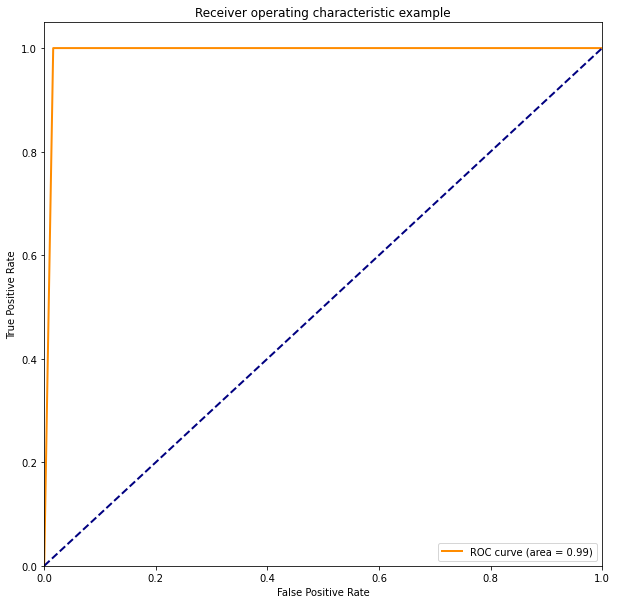

In [47]:
fpr, tpr, thresholds = metrics.roc_curve(ho_label_test,LR_value, pos_label=1)
roc_auc = auc(fpr,tpr) ###计算auc的值
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

<Figure size 432x288 with 0 Axes>

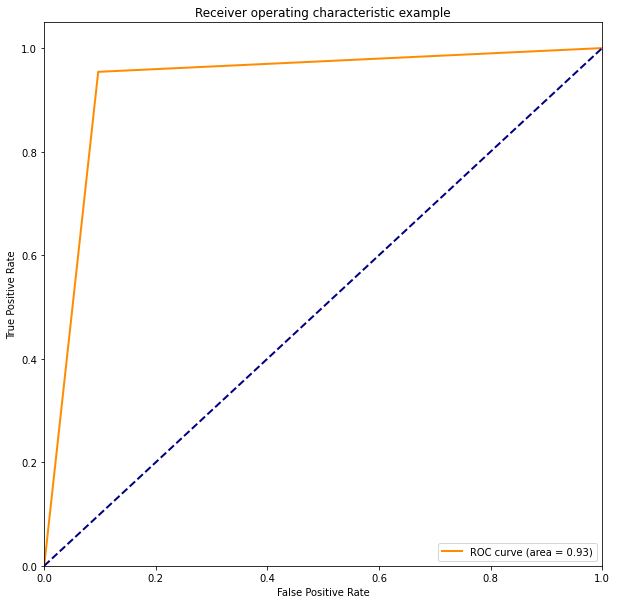

In [48]:
fpr, tpr, thresholds = metrics.roc_curve(ho_label_test,DT_value, pos_label=1)
roc_auc = auc(fpr,tpr) ###计算auc的值
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()